In [1]:
%pdb
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from collections import defaultdict
from os.path import join, basename, splitext

Automatic pdb calling has been turned ON


In [2]:
exps = ['poet_v16', 'poet_v16a', 'poet_v16b', 'poet_v16c']

In [3]:
parent_dict = {}
scores = defaultdict(list)
for exp in exps:
    log_dir = join('logs', exp)
    log_files = glob(join(log_dir, '*.log'))
    for log_file in log_files:
        data = pd.read_csv(log_file, header=0)
        this = splitext(basename(log_file))[0].split(exp+'.')[1]
        # try:
        parent = data['parent'][0]
        # except:
        #     continue
        parent_dict[this] = parent
        if this in scores:
            scores[this][0] += data['iteration'].to_numpy().tolist()
            scores[this][1] += data['score'].to_numpy().tolist()
        else:
            scores[this].append(data['iteration'].to_numpy().tolist())
            scores[this].append(data['score'].to_numpy().tolist())

In [4]:
all_parents = [*parent_dict.values()]
all_agents = [*scores.keys()]
len(all_agents), len(set(all_parents))

(137, 81)

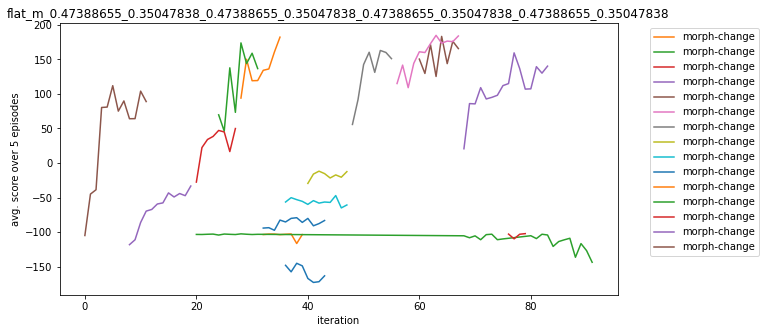

<Figure size 720x360 with 0 Axes>

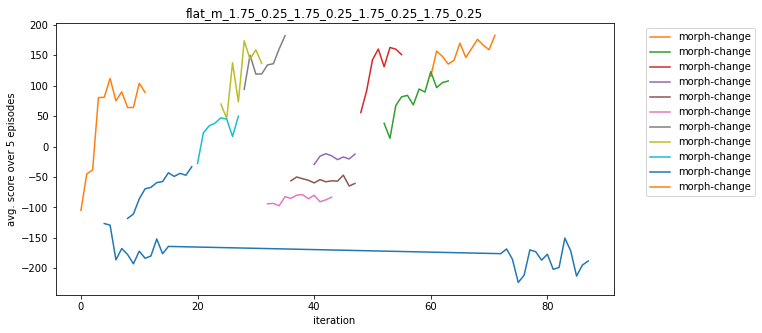

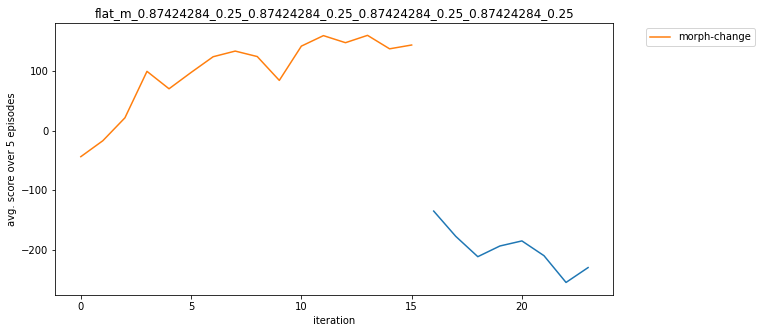

<Figure size 720x360 with 0 Axes>

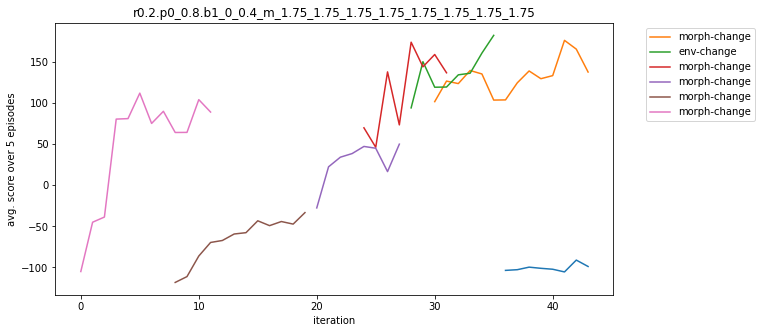

<Figure size 720x360 with 0 Axes>

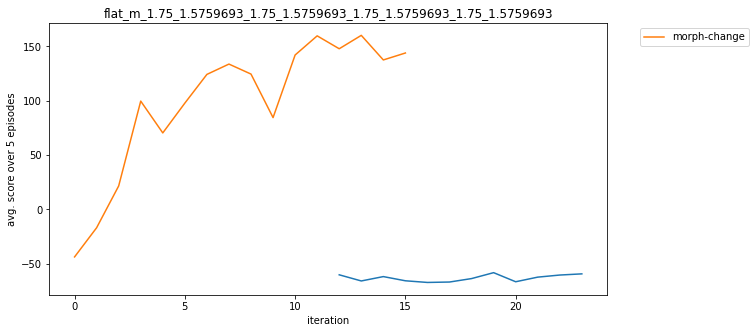

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

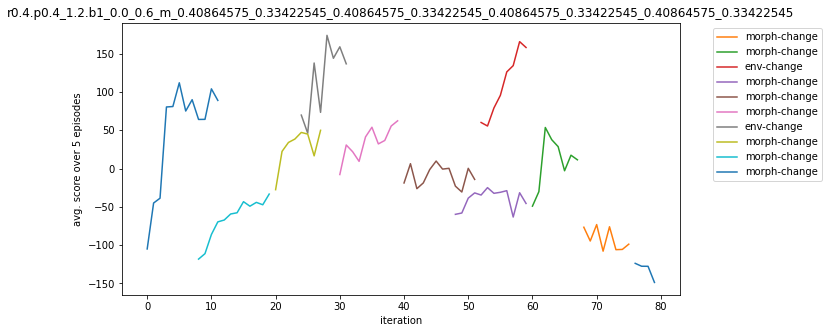

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

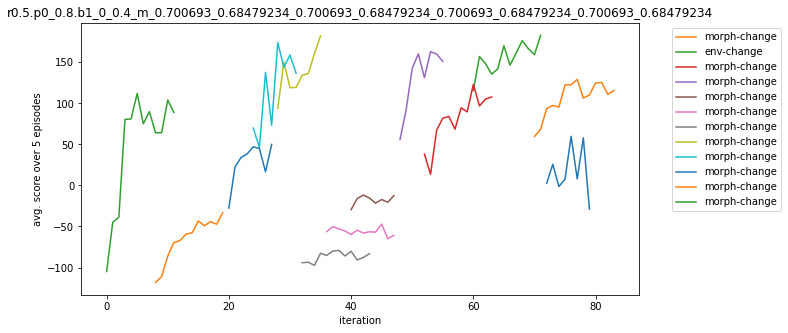

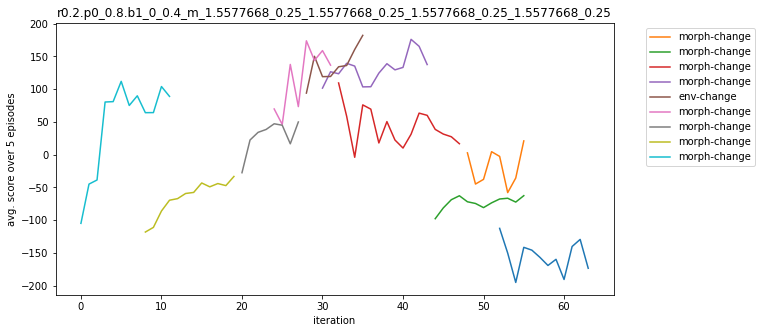

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

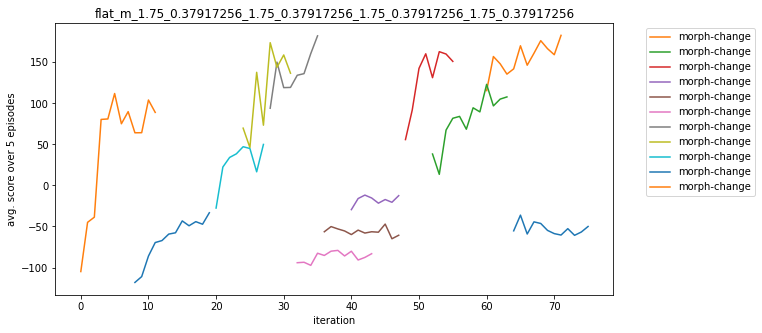

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

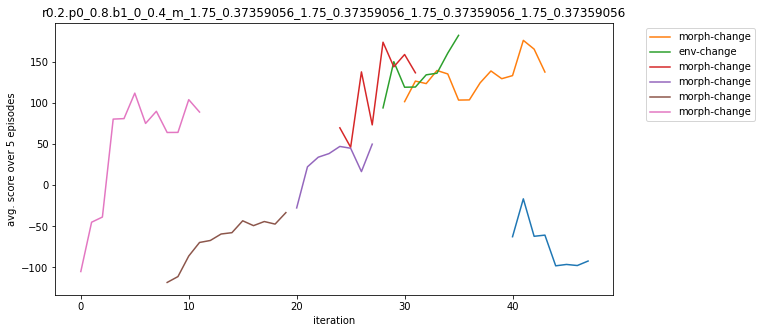

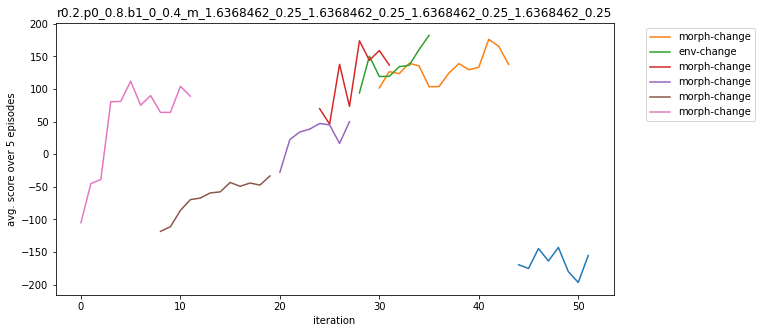

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

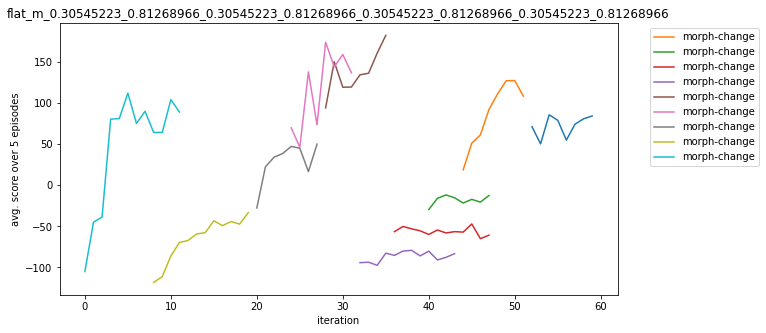

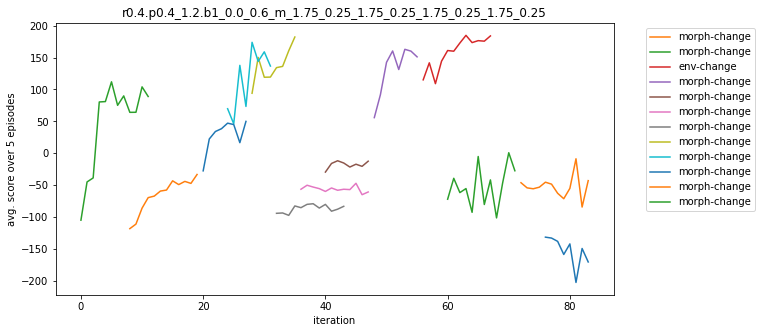

<Figure size 720x360 with 0 Axes>

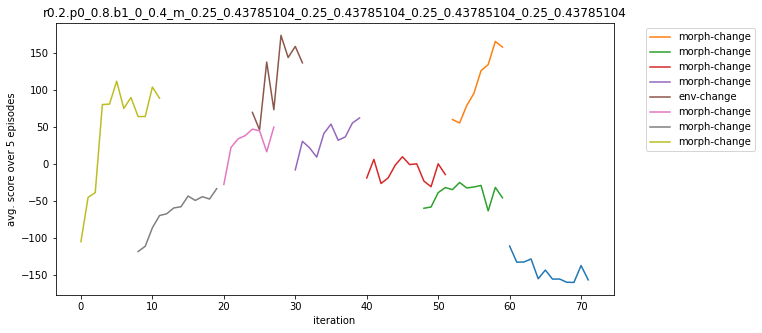

<Figure size 720x360 with 0 Axes>

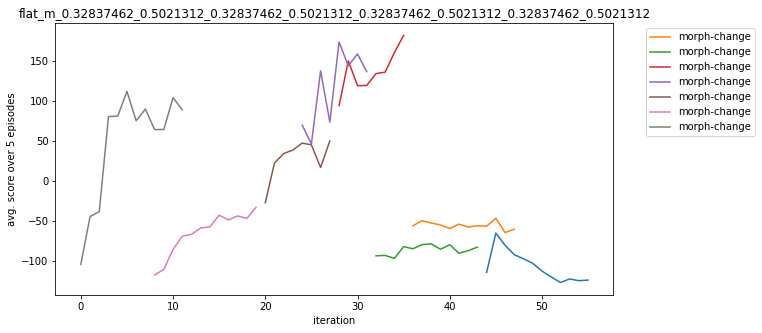

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

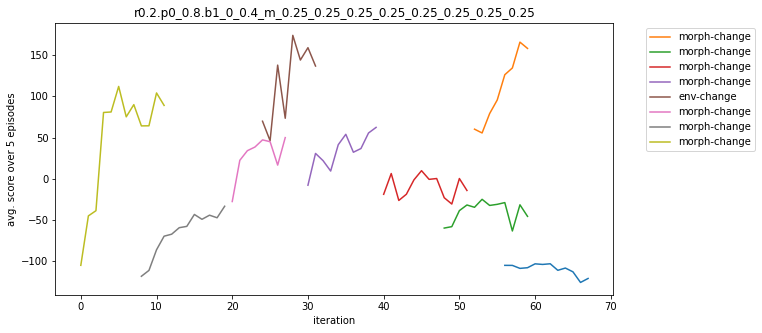

<Figure size 720x360 with 0 Axes>

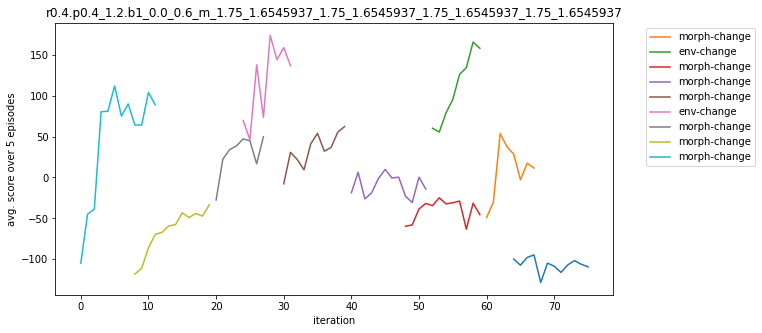

<Figure size 720x360 with 0 Axes>

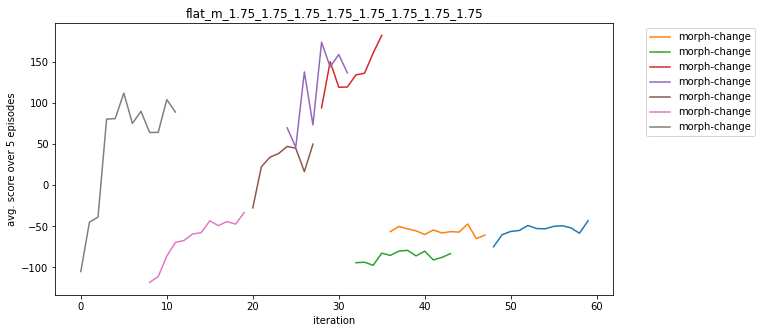

<Figure size 720x360 with 0 Axes>

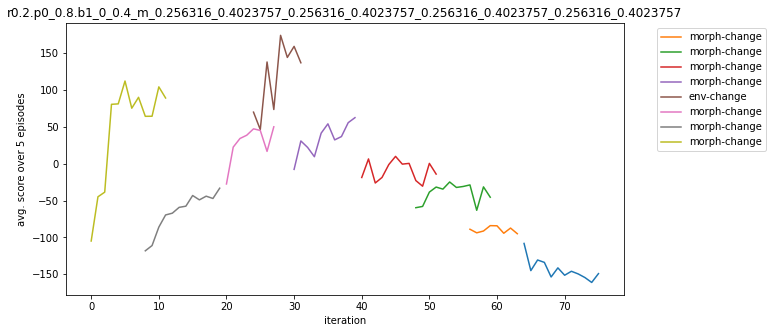

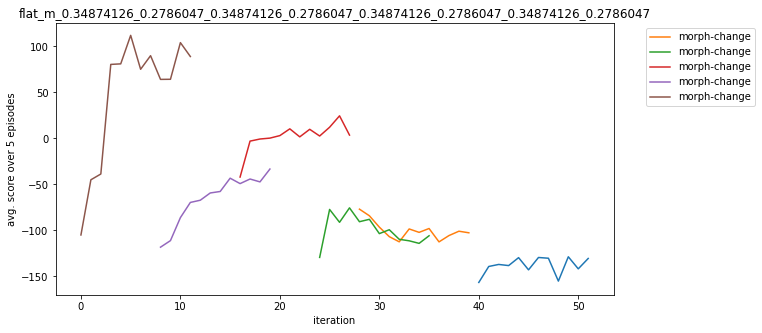

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

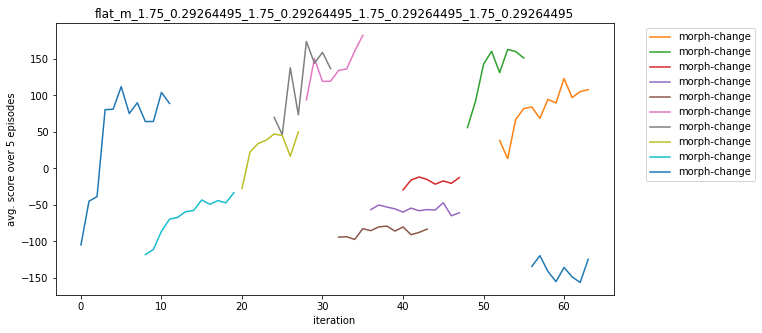

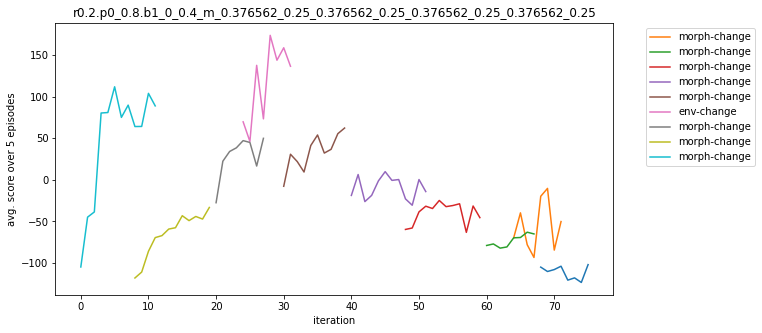

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

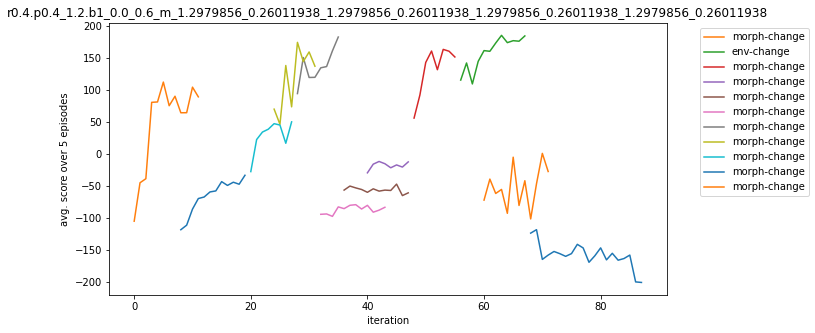

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

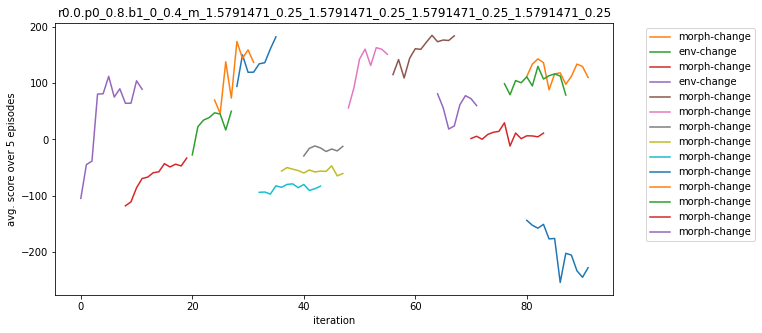

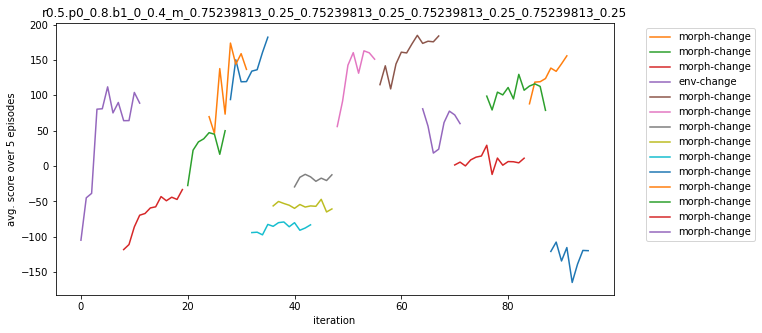

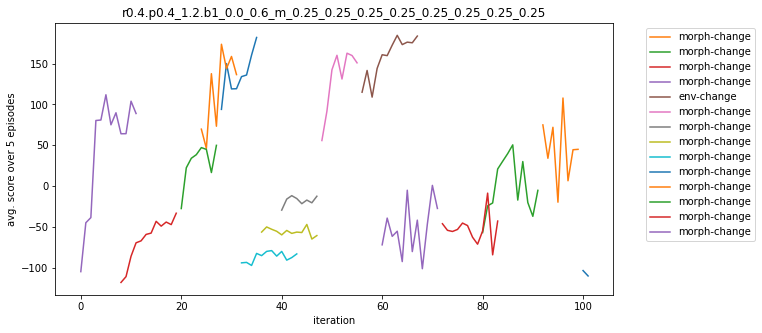

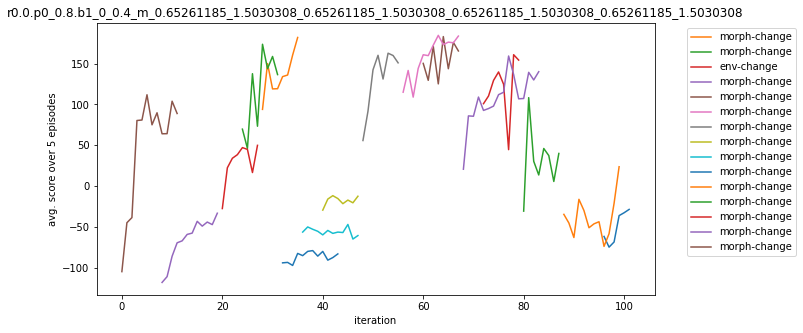

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

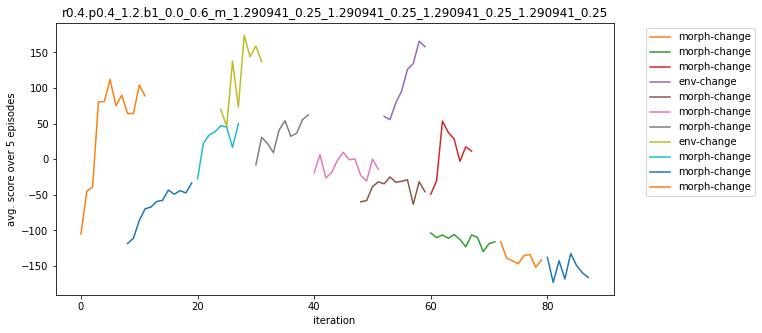

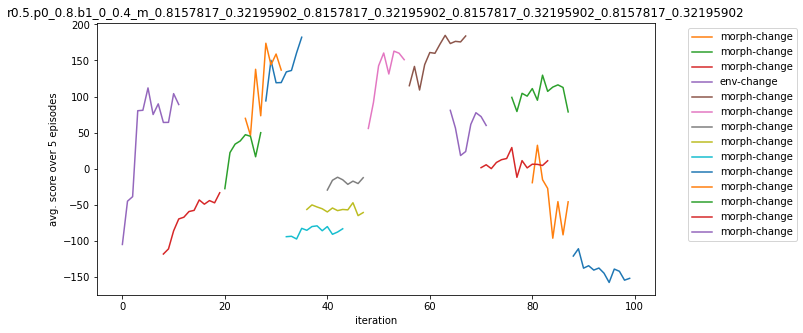

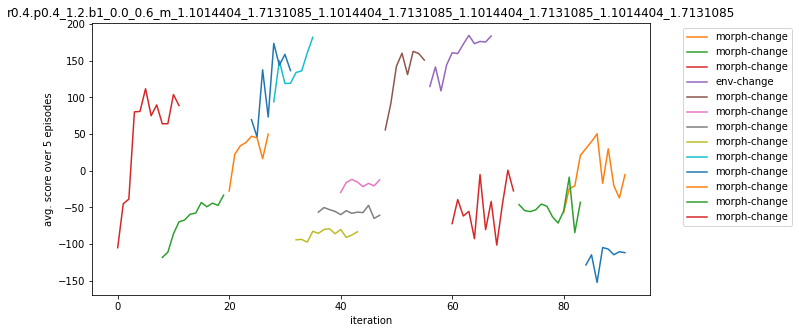

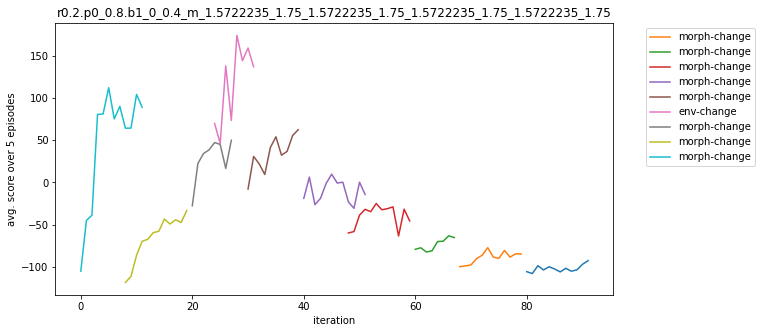

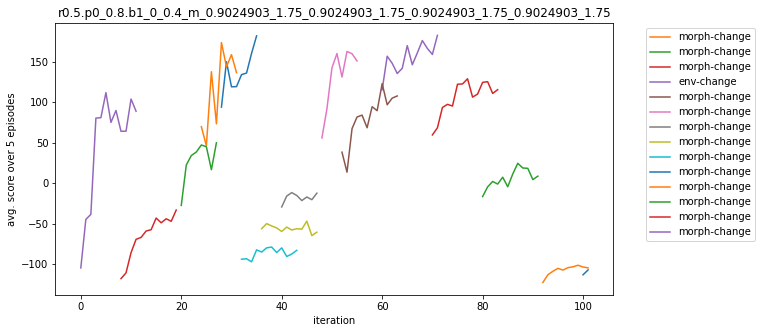

<Figure size 720x360 with 0 Axes>

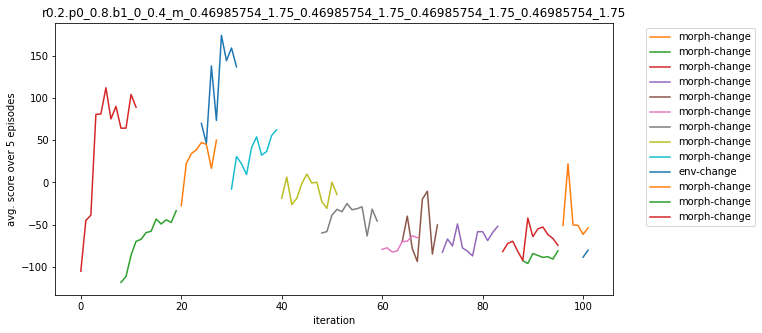

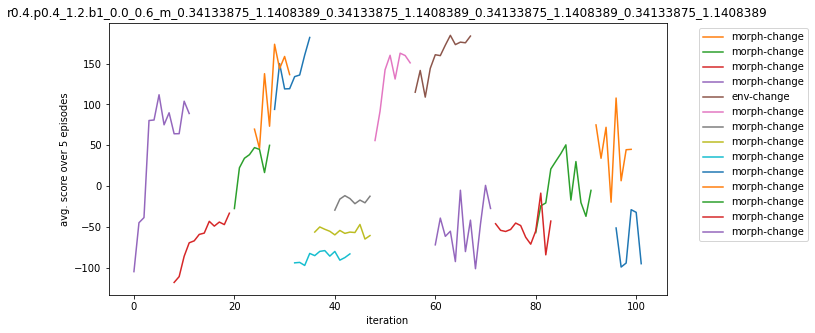

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

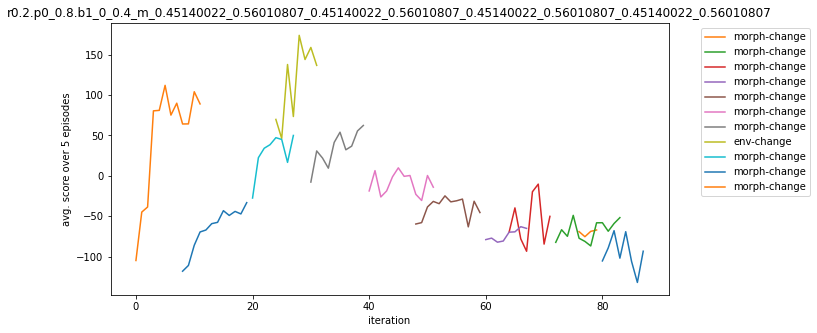

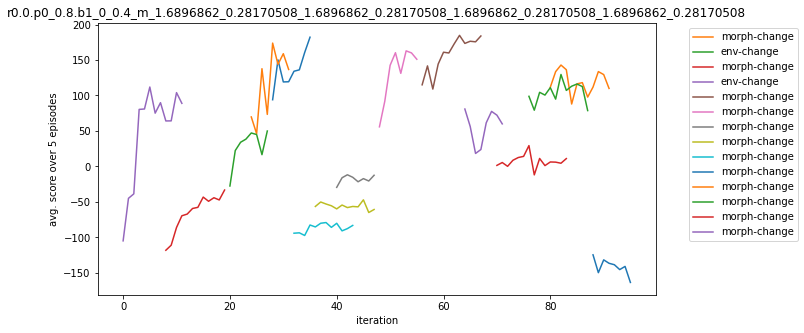

<Figure size 720x360 with 0 Axes>

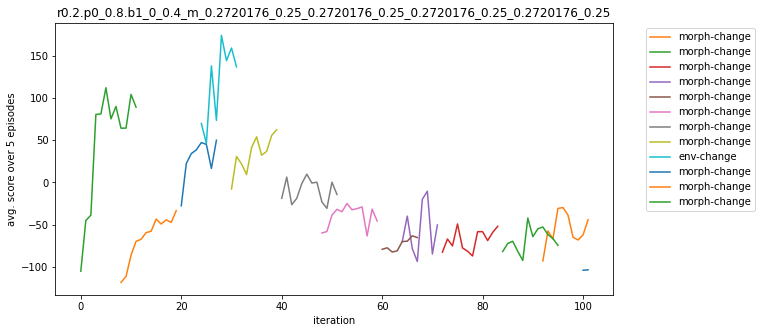

<Figure size 720x360 with 0 Axes>

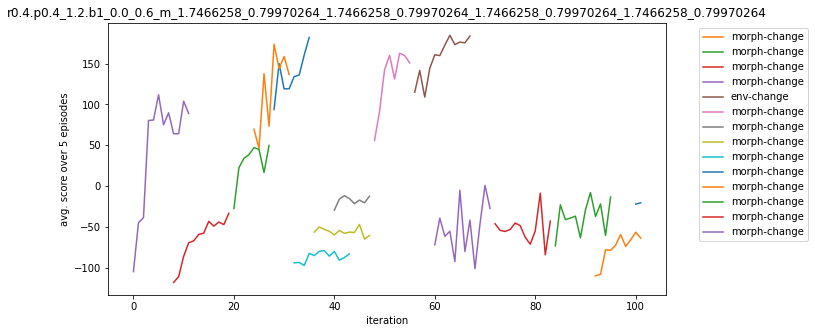

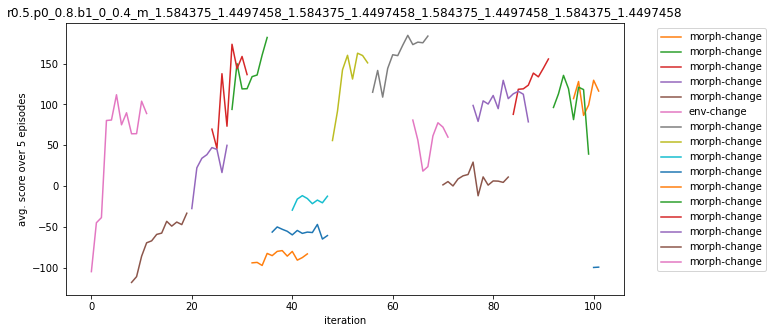

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

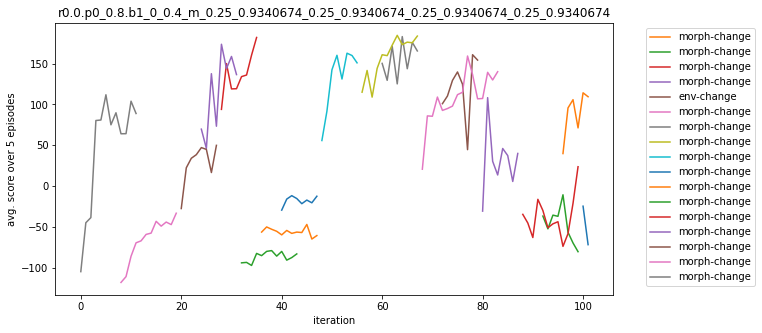

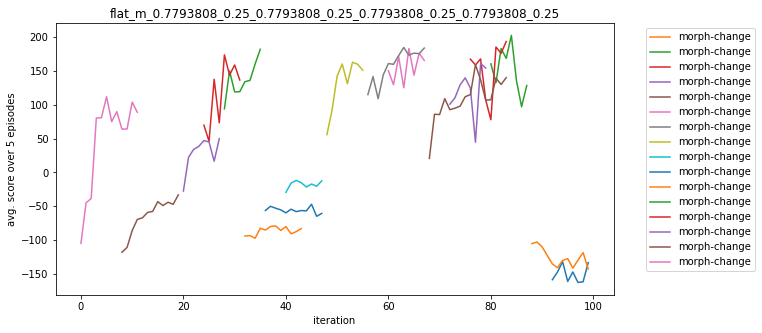

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

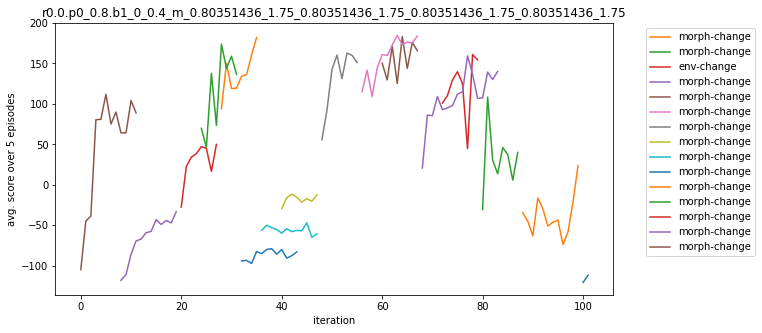

<Figure size 720x360 with 0 Axes>

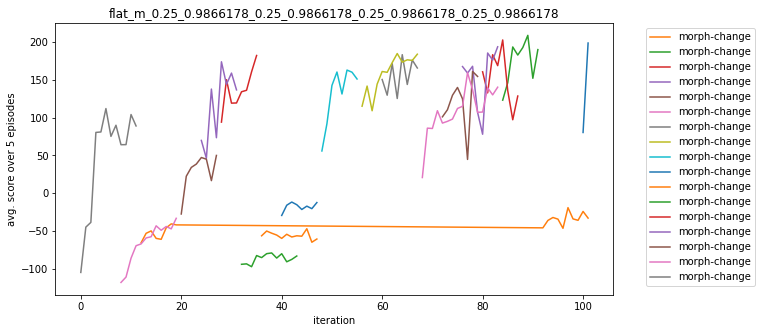

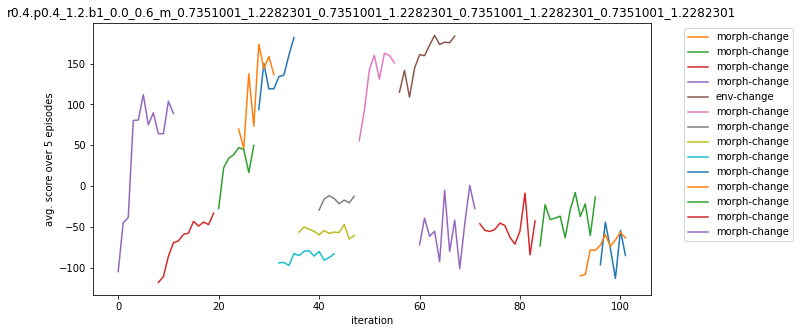

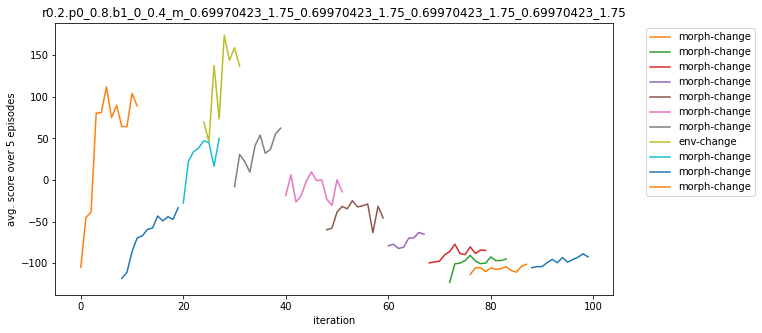

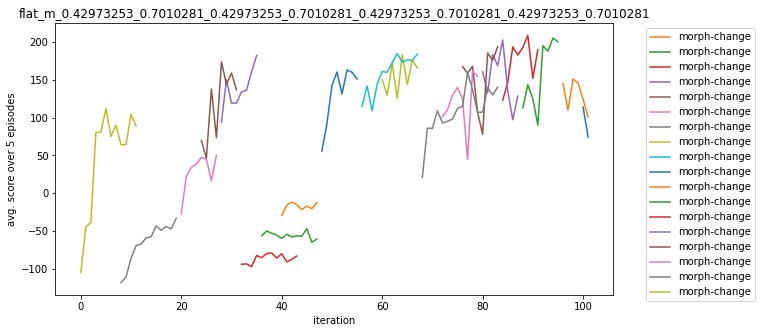

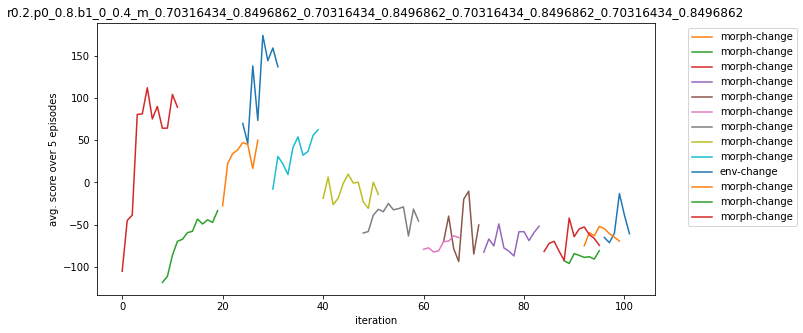

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

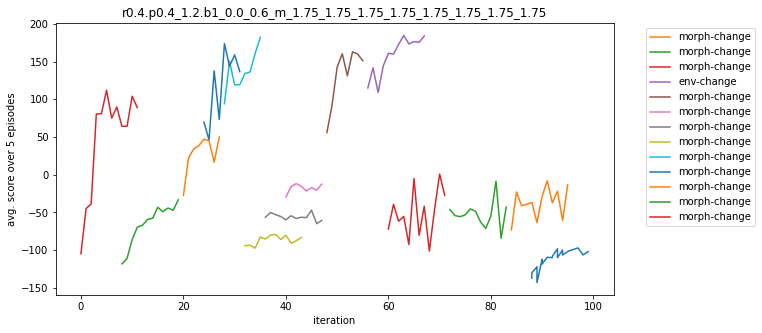

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

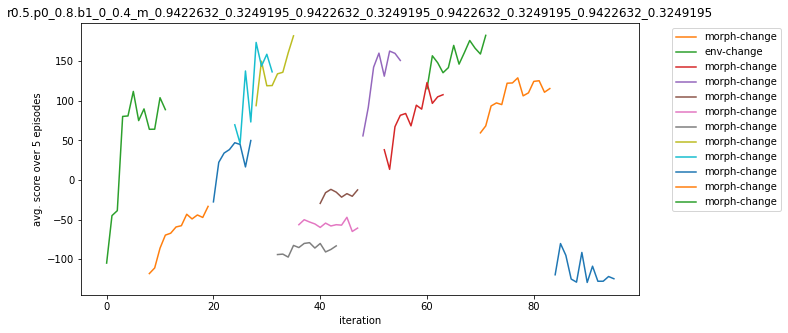

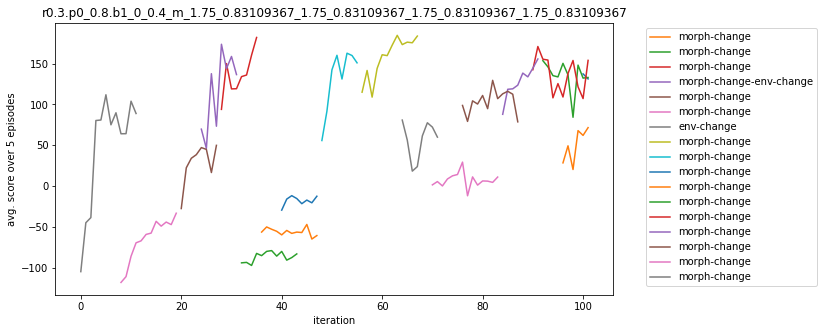

<Figure size 720x360 with 0 Axes>

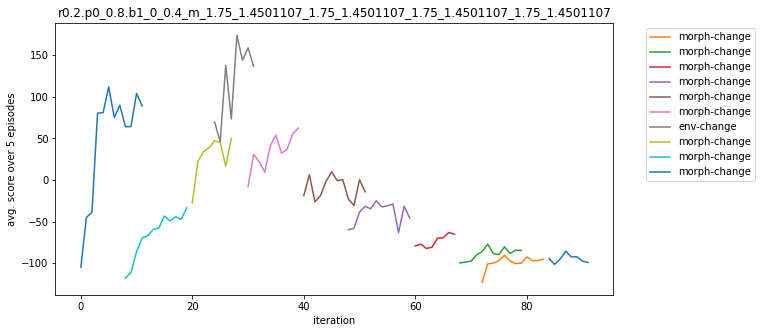

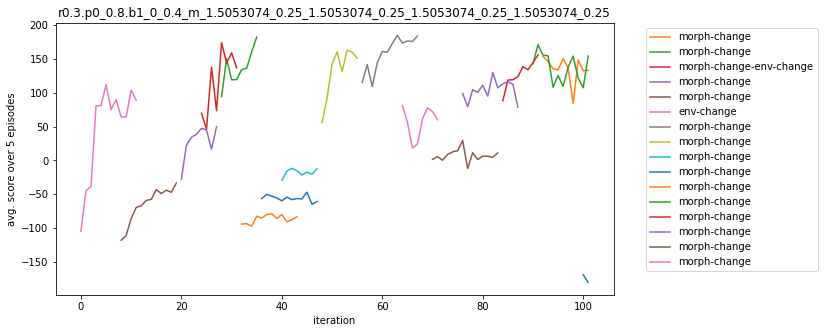

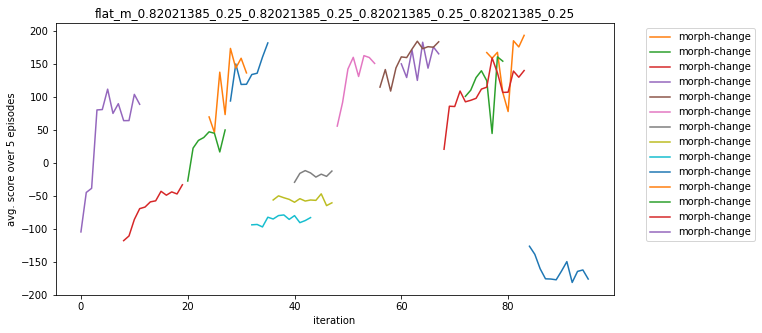

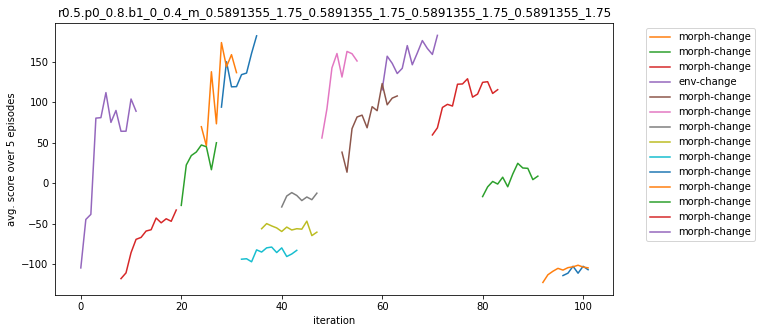

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

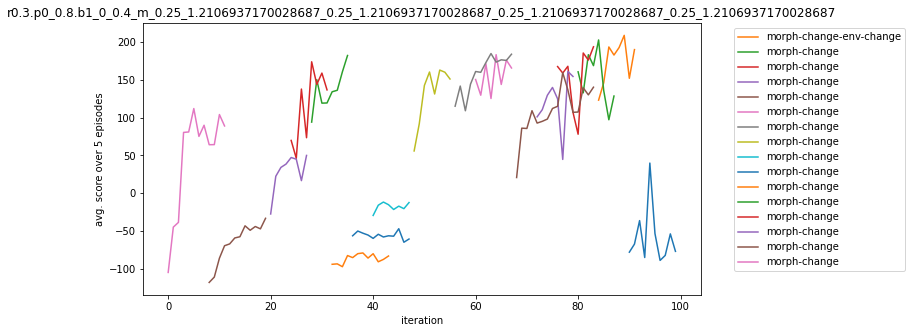

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

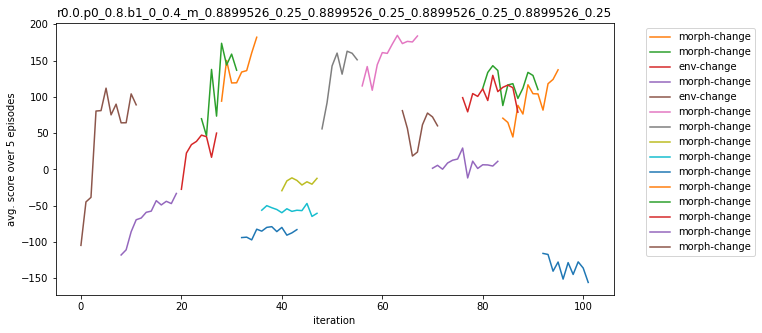

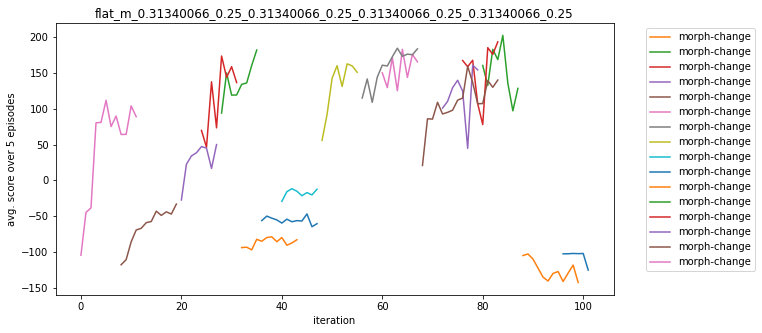

In [6]:
for agent in scores:
    plt.figure(figsize=(10, 5))
    if agent not in all_parents:
        plt.plot(scores[agent][0], scores[agent][1])
        parent = parent_dict[agent]
        child = agent
        while parent != -1:
            # print('{}\n{}\n'.format(child, parent))
            child_env, child_morph = child.split('_m_')
            parent_env, parent_morph = parent.split('_m_')
            label = []
            if child_morph != parent_morph:
                label.append('morph-change')
            if child_env != parent_env:
                label.append('env-change')
            plt.plot(scores[parent][0], scores[parent][1], label='-'.join(label))
            child = parent
            parent = parent_dict[child]
        plt.title(agent)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel('iteration')
        plt.ylabel('avg. score over 5 episodes')
        plt.show()
        plt.close()

In [ ]:
models/poet_v16c/r0.4.p0.4_1.2.b1_0.0_0.6_m_0.25_0.25_0.25_0.25_0.25_0.25_0.25_0.25

In [17]:
agent = 'r0.4.p0.4_1.2.b1_0.0_0.6_m_0.25_0.25_0.25_0.25_0.25_0.25_0.25_0.25'

In [18]:
parent = parent_dict[agent]
while parent != -1:
    print(parent)
    parent = parent_dict[parent]

r0.4.p0.4_1.2.b1_0.0_0.6_m_1.75_0.93008834_1.75_0.93008834_1.75_0.93008834_1.75_0.93008834
r0.4.p0.4_1.2.b1_0.0_0.6_m_1.3657178_1.0576828_1.3657178_1.0576828_1.3657178_1.0576828_1.3657178_1.0576828
r0.4.p0.4_1.2.b1_0.0_0.6_m_1.6899937_0.5977416_1.6899937_0.5977416_1.6899937_0.5977416_1.6899937_0.5977416
r0.4.p0.4_1.2.b1_0.0_0.6_m_0.8803767_0.72072136_0.8803767_0.72072136_0.8803767_0.72072136_0.8803767_0.72072136
flat_m_0.8803767_0.72072136_0.8803767_0.72072136_0.8803767_0.72072136_0.8803767_0.72072136
flat_m_1.3007705_0.813862_1.3007705_0.813862_1.3007705_0.813862_1.3007705_0.813862
flat_m_1.1949766_0.5403456_1.1949766_0.5403456_1.1949766_0.5403456_1.1949766_0.5403456
flat_m_1.4563475_1.4172946_1.4563475_1.4172946_1.4563475_1.4172946_1.4563475_1.4172946
flat_m_0.80310696_1.6579621_0.80310696_1.6579621_0.80310696_1.6579621_0.80310696_1.6579621
flat_m_1.3752432_0.9607895_1.3752432_0.9607895_1.3752432_0.9607895_1.3752432_0.9607895
flat_m_0.9003809_0.82197046_0.9003809_0.82197046_0.9003809